In [1]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

In [2]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
from urllib2 import urlopen
import matplotlib.pyplot as plt
import unicodedata
import requests
import re

%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

In [4]:
import seaborn as sns
from seaborn import plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

In [5]:
from sklearn import metrics

In [6]:
df = pd.read_csv('dat_engRATE.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 14 columns):
Author             233 non-null object
Movie              233 non-null object
Rating             233 non-null float64
Rating_Count       233 non-null int64
Pages              233 non-null int64
Director           233 non-null object
Genre              233 non-null object
Metascore          233 non-null int64
Year               233 non-null int64
imdbRating         233 non-null float64
tomatoRating       233 non-null float64
tomatoU            233 non-null float64
logRating_Count    233 non-null float64
w_Rating           233 non-null float64
dtypes: float64(6), int64(4), object(4)
memory usage: 25.6+ KB


In [9]:
df_smaller = df.loc[:,['Rating', 'Rating_Count','w_Rating' ,'logRating_Count', 'Pages', 'Metascore',
                          'Year', 'imdbRating', 'tomatoRating','tomatoU' ]]

In [10]:
df_smaller[:3]

,Rating,Rating_Count,w_Rating,logRating_Count,Pages,Metascore,Year,imdbRating,tomatoRating,tomatoU
0,4.11,169979,3.27,5.23,297,86,1968,8.3,9.1,3.8
1,3.95,7455,2.33,3.87,448,42,2002,6.2,4.1,3.1
2,3.79,109745,2.91,5.04,307,75,2002,7.1,7.7,2.8


In [11]:
len(df_smaller)

233

In [12]:

df_smaller.describe()

,Rating,Rating_Count,w_Rating,logRating_Count,Pages,Metascore,Year,imdbRating,tomatoRating,tomatoU
count,233.000000,2.330000e+02,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000
mean,3.878412,2.348458e+05,2.812446,4.746781,345.407725,60.137339,2003.854077,6.880687,6.244206,3.450644
std,0.255708,4.620934e+05,0.568249,0.812915,153.032764,17.067514,10.089906,0.890619,1.425650,0.397527
min,2.860000,4.350000e+02,1.510000,2.640000,32.000000,22.000000,1959.000000,4.100000,2.800000,2.000000
25%,3.720000,1.330500e+04,2.420000,4.120000,263.000000,47.000000,1999.000000,6.200000,5.200000,3.200000
50%,3.910000,6.010400e+04,2.830000,4.780000,324.000000,60.000000,2005.000000,6.900000,6.300000,3.500000
75%,4.050000,2.336350e+05,3.170000,5.370000,416.000000,74.000000,2012.000000,7.600000,7.400000,3.700000
max,4.530000,3.726471e+06,4.310000,6.570000,1168.000000,96.000000,2016.000000,8.800000,9.200000,4.300000


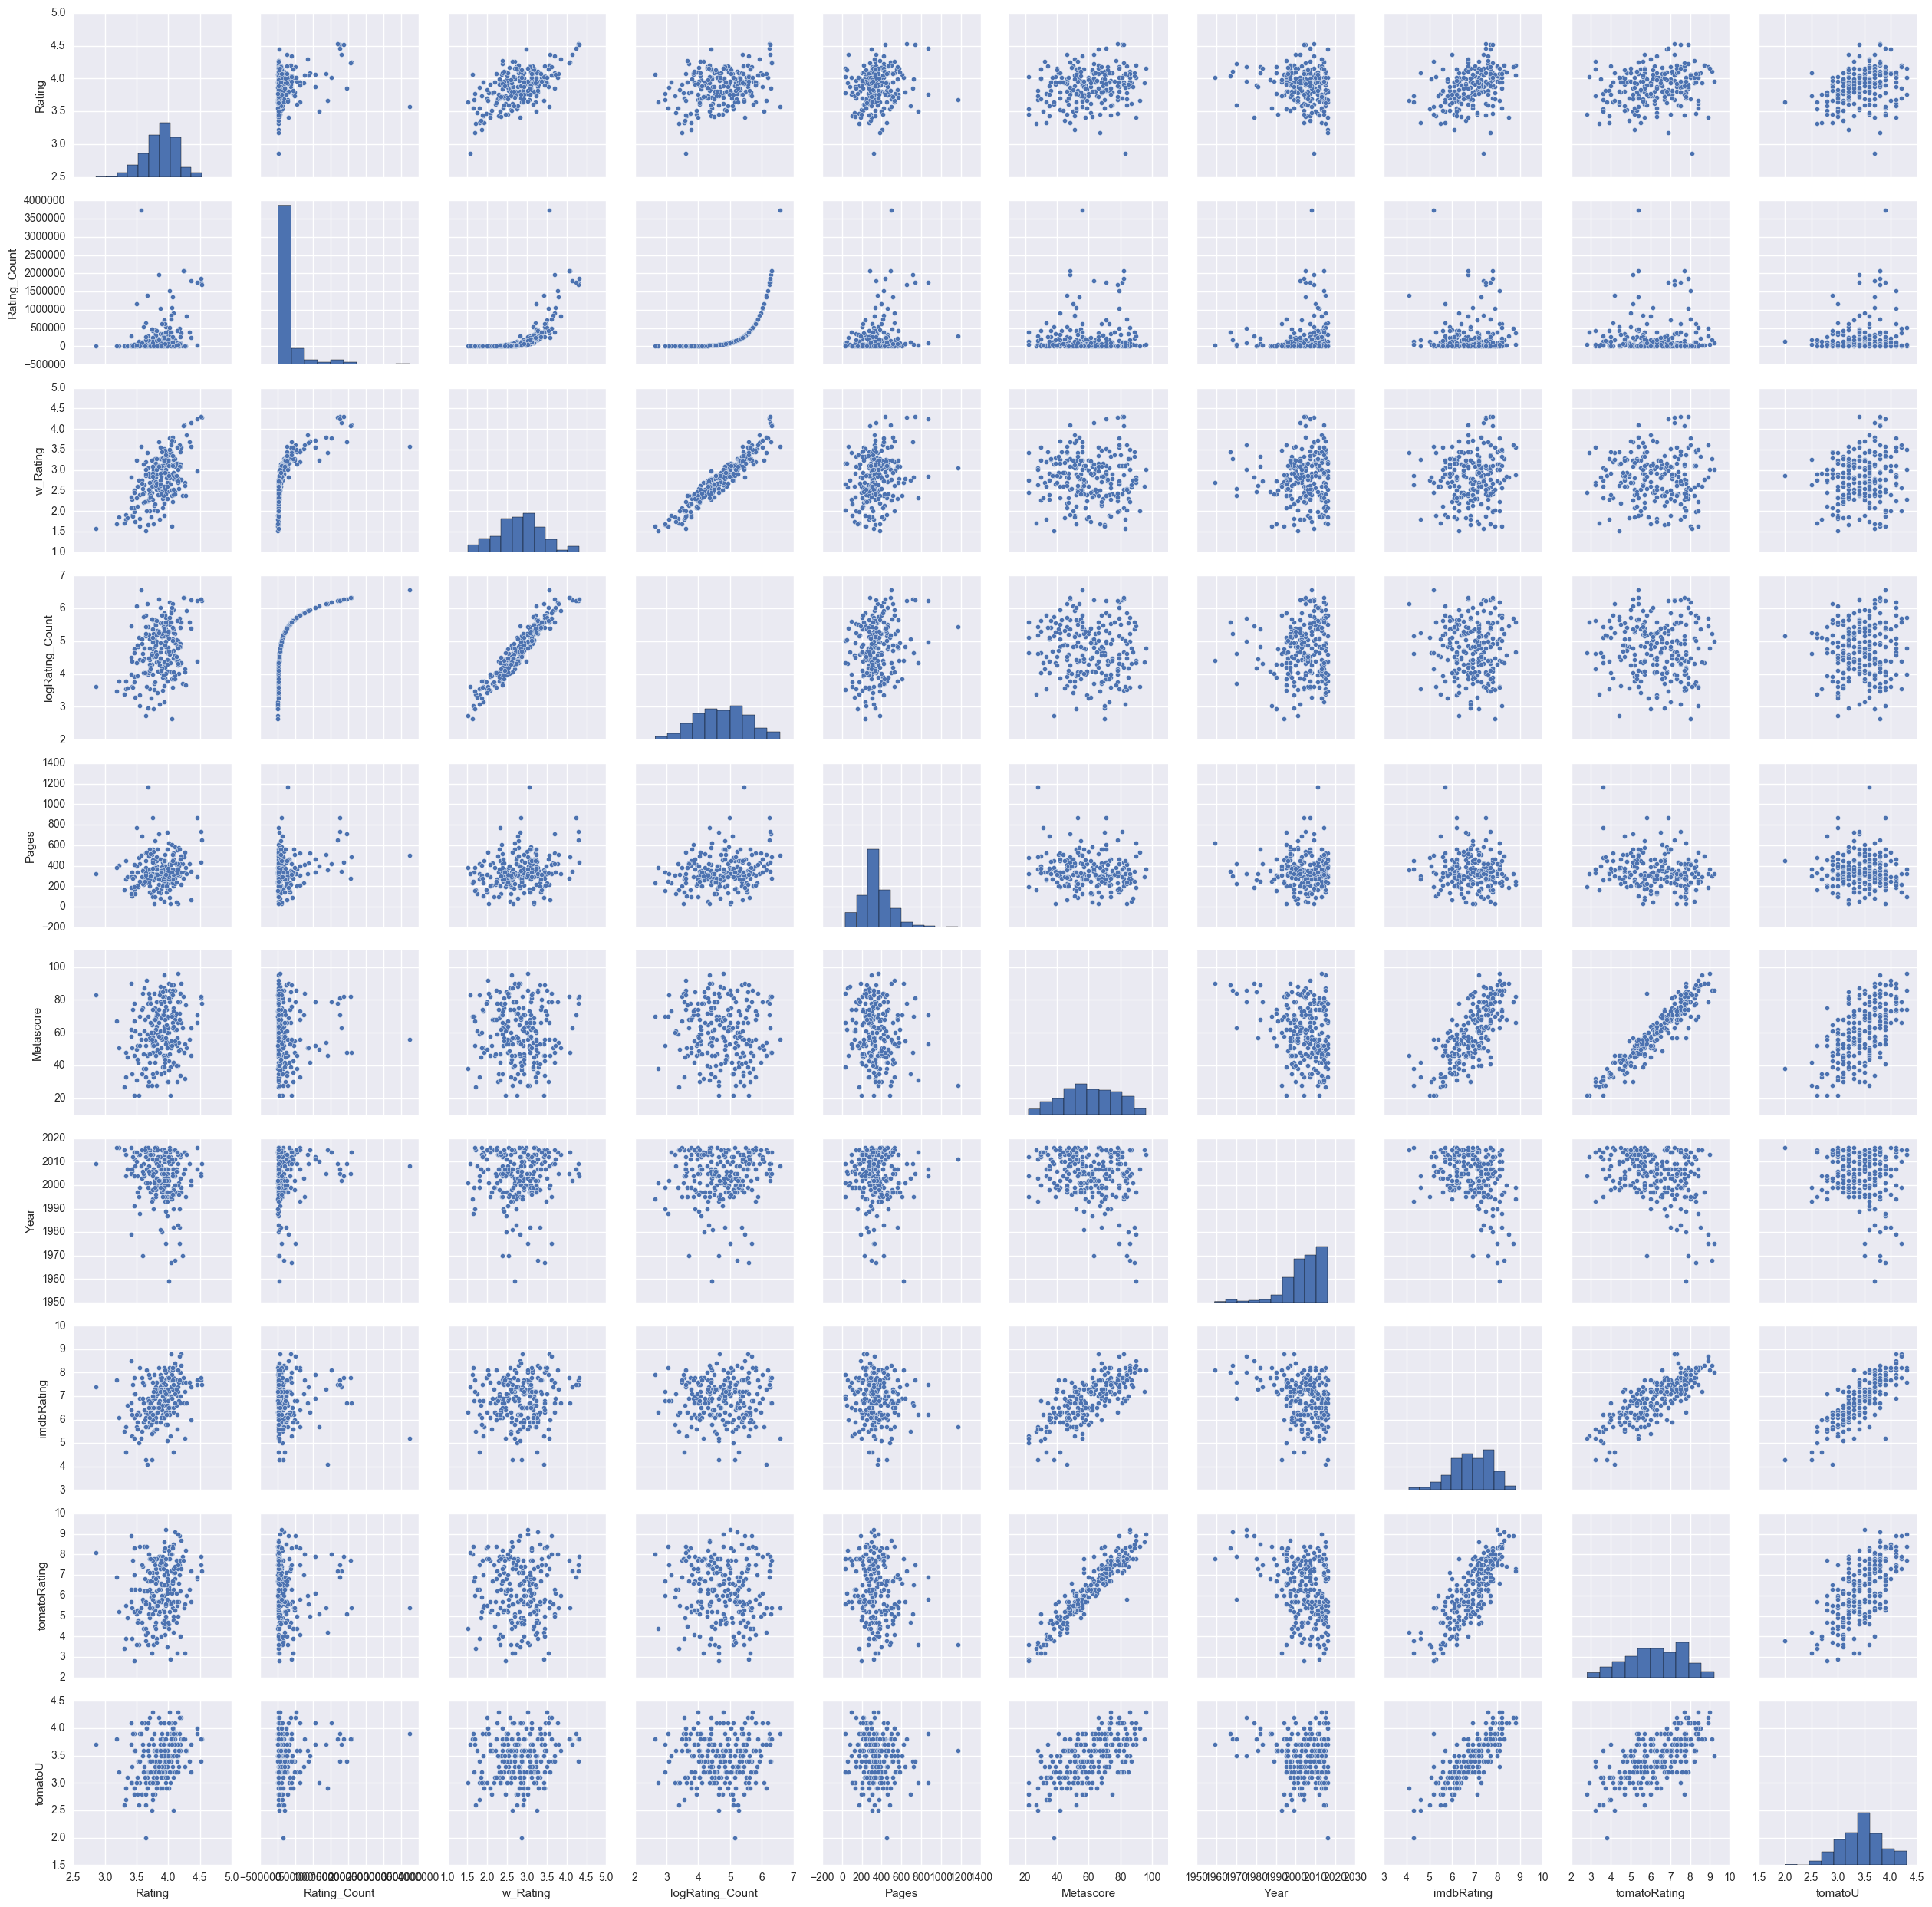

In [11]:

sns.pairplot(df_smaller)


Create a smaller Scatter Plot

''

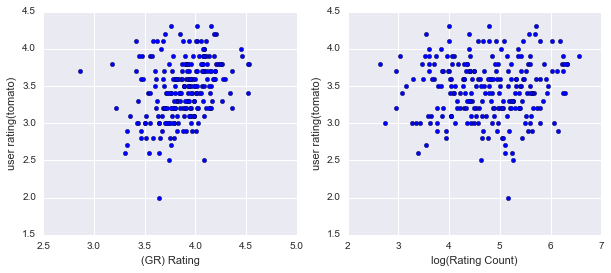

In [13]:
fig, ax = plt.subplots(1,2, figsize=(10,4))

ax[0].scatter(df_smaller.Rating, df_smaller.tomatoU)
ax[0].set_xlabel('(GR) Rating')
ax[0].set_ylabel('user rating(tomato)')
ax[1].scatter(df_smaller.logRating_Count, df_smaller.tomatoU)
ax[1].set_ylabel('user rating(tomato)')
ax[1].set_xlabel('log(Rating Count)')

plt.savefig('scatter_Correlation.eps', bbox_inches='tight',format='eps', dpi=1000)
;

In [14]:
df_smaller.columns

Index([u'Rating', u'Rating_Count', u'w_Rating', u'logRating_Count', u'Pages',
       u'Metascore', u'Year', u'imdbRating', u'tomatoRating', u'tomatoU'],
      dtype='object')

In [15]:
# use a subset for X 

X=df_smaller.loc[:,['Rating', 'Rating_Count','w_Rating' ,'logRating_Count', 'Pages','tomatoU' ,'imdbRating', 
                               'Year','tomatoRating']] #imdbRating', 'tomatoRating']]#, 'tomatoU' ]]
        

In [16]:
# use overall Score as Target
#y = df_smaller['Metascore']

# user-based
#y = df_smaller['tomatoRating']

# user-based
y = df_smaller['imdbRating']

In [17]:
df_smaller.tomatoU.describe()

count    233.000000
mean       3.450644
std        0.397527
min        2.000000
25%        3.200000
50%        3.500000
75%        3.700000
max        4.300000
Name: tomatoU, dtype: float64

In [18]:
#Split the data 70-30 train/test
''' randomly select 30% of rows and choose to be the test-set
'''

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

# Model 1

+ simplest model
fit the rating, and the weighted rating against the IMDB
+ Predict IMDB Rating
    + Tomato rating 
    + Metacritic
    
    
### R^2 values: 
    

In [19]:

#selected_columns = ['imdbRating']
selected_columns = ['w_Rating']#['Rating']
y = df_smaller['imdbRating']

In [20]:
### DEFINE A MODEL OBJECT (LinearRegression)
lr_model1 = LinearRegression()

"""### that Object always has a fit method
    ### give matrix of predictors: X
    ### and vector of results : y 
    TRAIN SET is 70% of data
    >> your test set should be just big enough to give an accurate evalutation
"""
lr_model1.fit(X_train.loc[:,selected_columns],y_train)

/Users/billierolih/anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
list(zip(X_train.columns,lr_model1.coef_))

[('Rating', 0.25679158613441888)]

In [22]:
test_set_pred = lr_model1.predict(X_test.loc[:,selected_columns])

''

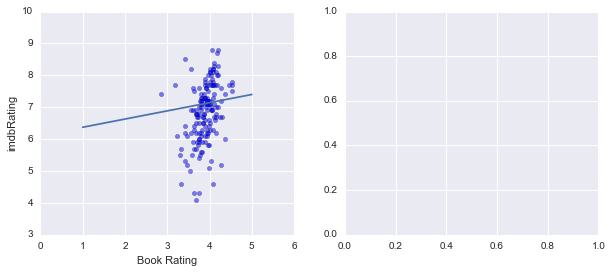

In [23]:
#plt.style.use('classic')
fig, ax = plt.subplots(1,2, figsize=(10,4))

ax[0].scatter(X_train['Rating'], y_train, alpha=0.5)
ax[0].set_xlabel('Book Rating')
ax[0].set_ylabel('imdbRating')
vec1=np.linspace(1,5)
ax[0].plot(vec1, lr_model1.intercept_ + lr_model1.coef_[0]*vec1);

# plt.plot(vec1, lr_model1.intercept_ + lr_model1.coef_[0]*vec1);
# plt.xlabel('Book Rating')
# plt.ylabel('imdbRating')

#plt.savefig('tomato-CriticUser.eps', bbox_inches='tight',format='eps', dpi=1000)
;

In [24]:
#RMSE
print ("RMSE ", np.sqrt(np.mean((test_set_pred - y_test)**2)))
#MAD
print ("MAD" ,(np.mean(np.abs(test_set_pred - y_test))))
print (metrics.r2_score(y_test,test_set_pred))

RMSE  0.788166460865
MAD 0.68651252961
-0.0917863326031


''

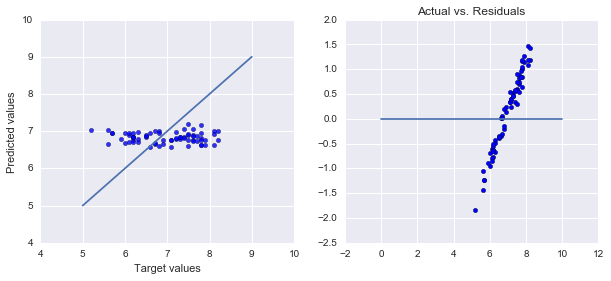

In [25]:
# plot against test
fig, ax = plt.subplots(1,2, figsize=(10,4))

ax[0].scatter(y_test,test_set_pred, alpha=0.8)
ax[0].set_xlim(4,10)
ax[0].set_ylim(4,10)
ax[0].plot(np.linspace(5,9), np.linspace(5,9))
ax[0].set_xlabel('Target values')
ax[0].set_ylabel('Predicted values')

lin_reg_residuals = y_test - test_set_pred
ax[1].scatter(y_test, lin_reg_residuals)
ax[1].plot([0,10], [0, 0])
ax[1].set_title("Actual vs. Residuals")

# plt.scatter(y_test, lin_reg_residuals)
# plt.plot([0,10], [0, 0])
# plt.title("Actual vs. Residuals")

#plt.savefig('IMDBRating.eps', bbox_inches='tight',format='eps', dpi=1000)
;

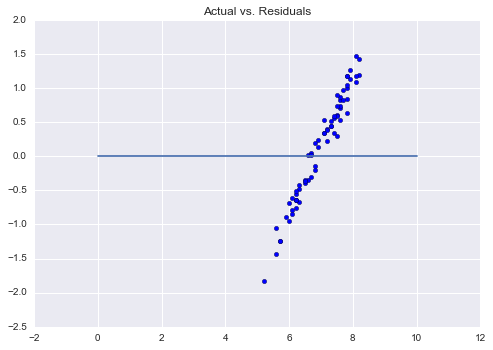

In [26]:
### Residual plot above suggests the the model is skewed for higher Imdb values
# Plot Residuals

lin_reg_residuals = y_test - test_set_pred

plt.scatter(y_test, lin_reg_residuals)
plt.plot([0,10], [0, 0])
plt.title("Actual vs. Residuals")

Rating on its own is not a great predictor. Weighted rating on its own does a little better in terms of the R^2 value, but it also demonstrates an even stronger non-random error from the residual plot. Best is to consider more features



## Model 1b: considering a few more features

In [33]:

X=df_smaller.loc[:,['Rating', 'Rating_Count','w_Rating' ,'logRating_Count']]#, 'Pages']]#,'tomatoU' ,'imdbRating', 
                               #'Year']]#,'tomatoRating']] #imdbRating', 'tomatoRating']]#, 'tomatoU' ]]
y = df_smaller['imdbRating']#['tomatoRating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [34]:
lr_model_1b = LinearRegression()
lr_model_1b.fit(X_train,y_train)
print (list(zip(X_train.columns,lr_model_1b.coef_)) )
test_set_pred = lr_model_1b.predict(X_test)

[('Rating', -0.84316359702823651), ('Rating_Count', -1.9971505616032825e-07), ('w_Rating', 3.4826557497567965), ('logRating_Count', -2.1360546948936805)]


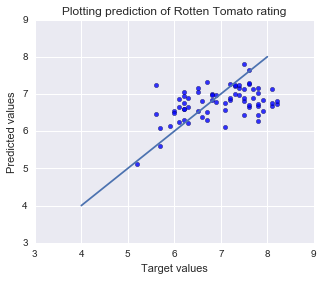

In [35]:
plt.figure(figsize=(5,4))
plt.scatter( y_test,test_set_pred, alpha=0.8)
plt.plot(np.linspace(4,8), np.linspace(4,8))

plt.title('Plotting prediction of Rotten Tomato rating')
plt.ylabel('Predicted values')
plt.xlabel('Target values')

In [36]:
#RMSE
print ("RMSE ", np.sqrt(np.mean((test_set_pred - y_test)**2)))
#MAD
print ("MAD" ,(np.mean(np.abs(test_set_pred - y_test))))
print (metrics.r2_score(y_test,test_set_pred))

RMSE  0.712525048098
MAD 0.56712925894
0.107718219657


**R-squared score is a little better/lower  when more features are considered** .and as can be seen below, the residual errors are a little bit more random (thought they still maintain a dependency with increasing imdb Score. 
Also root mean square error is lower. 

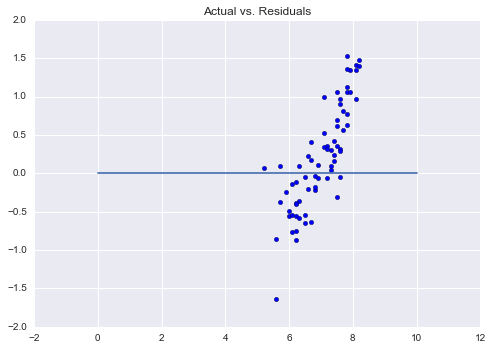

In [76]:
# Plot Residuals

lin_reg_residuals = y_test - test_set_pred

plt.scatter(y_test, lin_reg_residuals)
plt.plot([0,10], [0, 0])
plt.title("Actual vs. Residuals")

# Add square Rating ; do same
be careful about which dataframe using, df_smaller or X !!!

In [43]:
X['sqrRating'] = np.square(X.Rating)
X[:3]

,Rating,Rating_Count,w_Rating,logRating_Count,sqrRating
0,4.11,169979,3.27,5.23,16.8921
1,3.95,7455,2.33,3.87,15.6025
2,3.79,109745,2.91,5.04,14.3641


In [48]:
X[X['sqrRating'].isnull()]
X[X['sqrRating'].isnull()]

,Rating,Rating_Count,w_Rating,logRating_Count,sqrRating


In [50]:
X=X.loc[:,['Rating', 'Rating_Count','w_Rating' ,'logRating_Count', 'sqrRating']]
y = df_smaller['imdbRating']#['tomatoRating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [51]:
lr_model_3 = LinearRegression()
lr_model_3.fit(X_train,y_train)
print (list(zip(X_train.columns,lr_model_3.coef_)) )
test_pred_3 = lr_model_3.predict(X_test)

[('Rating', -4.5176868365515261), ('Rating_Count', -2.0341893492376312e-07), ('w_Rating', 2.2256483600194459), ('logRating_Count', -1.3866045813312478), ('sqrRating', 0.59467272482792732)]


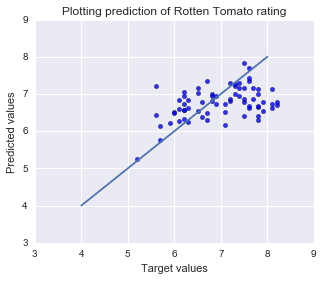

In [52]:
plt.figure(figsize=(5,4))
plt.scatter( y_test,test_pred_3, alpha=0.8)
plt.plot(np.linspace(4,8), np.linspace(4,8))

plt.title('Plotting prediction of Rotten Tomato rating')
plt.ylabel('Predicted values')
plt.xlabel('Target values')

In [53]:
#RMSE
print ("RMSE ", np.sqrt(np.mean((test_pred_3 - y_test)**2)))
#MAD
print ("MAD" ,(np.mean(np.abs(test_pred_3 - y_test))))
print (metrics.r2_score(y_test,test_pred_3))

RMSE  0.718214113594
MAD 0.567980290729
0.0934127160487


ok, RMSE is a little worse, and below residuals also seem to not improve

** could try other polynomial values, but doesn't seem to actually improve anything **


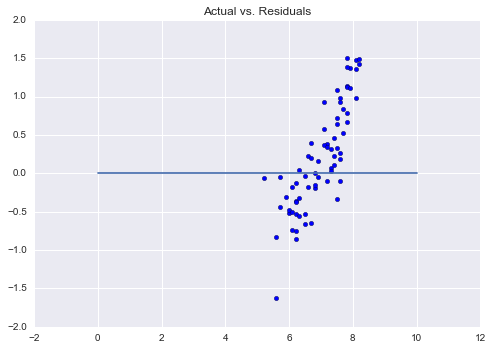

In [55]:
# Plot Residuals
plt.figure()
lin_reg_residuals = y_test - test_pred_3

plt.scatter(y_test, lin_reg_residuals)
plt.plot([0,10], [0, 0])
plt.title("Actual vs. Residuals")

# Random Forest Regressor? 

In [56]:
X=X.loc[:,['Rating', 'Rating_Count','w_Rating' ,'logRating_Count', 'sqrRating']]
y = df_smaller['imdbRating']#['tomatoRating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [59]:
estimator = RandomForestRegressor(random_state=0, n_estimators=100)
estimator.fit(X_train,y_train)
estimator.feature_importances_

array([ 0.24187038,  0.15743141,  0.20305967,  0.12827429,  0.26936425])

In [60]:
list(zip(X_train.columns,estimator.feature_importances_))

[('Rating', 0.24187038436496217),
 ('Rating_Count', 0.15743140646463924),
 ('w_Rating', 0.2030596675654732),
 ('logRating_Count', 0.12827429239586244),
 ('sqrRating', 0.2693642492090631)]

In [64]:
scores = cross_val_score(estimator, X_train, y_train)
print ("Score from Random Forest Regressor {}".format( scores.mean()))

Score from Random Forest Regressor -0.0470324452095


In [67]:
#### predict with Random for est
rf_pred = estimator.predict(X_test)
# gives an array of scores

print ("RMSE ", np.sqrt(np.sum((rf_pred - y_test)**2)/len(y_test)) )


RMSE  0.881294615892


** using Random Forest, the RMSE is actually a little higher **

 

## Model 2: tomatoRating



In [111]:
# use a subset for X 

X=df_smaller.loc[:,['Rating']]#, 'Rating_Count','w_Rating' ,'logRating_Count', 'Pages','tomatoU' ,'imdbRating', 
                               #'Year']]#,'tomatoRating']] #imdbRating', 'tomatoRating']]#, 'tomatoU' ]]

In [112]:
y = df_smaller['tomatoRating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [113]:
lr_model2 = LinearRegression()
lr_model2.fit(X_train.loc[:,selected_columns],y_train)
print (list(zip(X_train.columns,lr_model2.coef_)) )
test_set_pred = lr_model2.predict(X_test.loc[:,selected_columns])

[('Rating', 1.5144841230173283)]


In [114]:
test_set_pred2 = lr_model2.predict(X_test.loc[:,selected_columns])

''

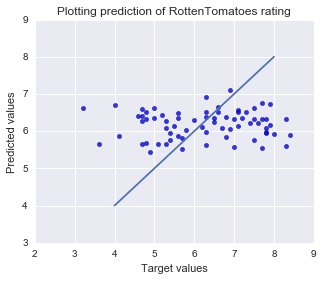

In [115]:
# plot against test
plt.figure(figsize=(5,4))
plt.scatter( y_test,test_set_pred2, alpha=0.8)
plt.plot(np.linspace(4,8), np.linspace(4,8))

plt.title('Plotting prediction of RottenTomatoes rating')
plt.ylabel('Predicted values')
plt.xlabel('Target values')

#plt.savefig('tomato-CriticUser.eps', bbox_inches='tight',format='eps', dpi=1000)
;

In [116]:
#RMSE
print ("RMSE ", np.sqrt(np.mean((test_set_pred2 - y_test)**2)))
#MAD
print ("MAD" ,(np.mean(np.abs(test_set_pred2 - y_test))))

RMSE  1.30216395707
MAD 1.07032451213


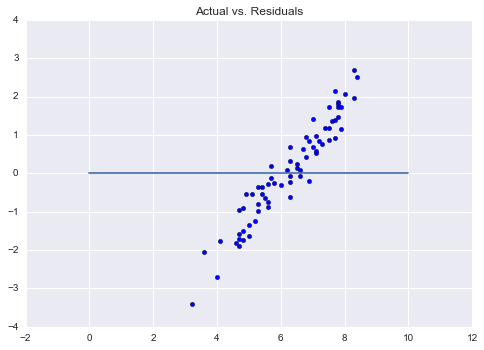

In [117]:
# Plot Residuals

lin_reg_residuals = y_test - test_set_pred2

plt.scatter(y_test, lin_reg_residuals)
plt.plot([0,10], [0, 0])
plt.title("Actual vs. Residuals")

## Model 3: Metacritic

In [118]:
# use a subset for X 

X=df_smaller.loc[:,['Rating', 'Rating_Count','w_Rating' ,'logRating_Count', 'Pages','tomatoU' ,'imdbRating', 
                               'Year','tomatoRating']] #imdbRating', 'tomatoRating']]#, 'tomatoU' ]]
        

In [119]:
y = df_smaller['Metascore']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [120]:
lr_model3 = LinearRegression()
lr_model3.fit(X_train.loc[:,selected_columns],y_train)
print (list(zip(X_train.columns,lr_model3.coef_)) )
test_set_pred3 = lr_model3.predict(X_test.loc[:,selected_columns])


[('Rating', 16.097300698417861)]


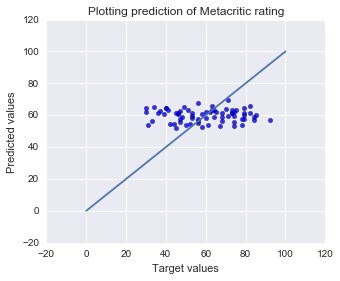

In [121]:
# plot against test
plt.figure(figsize=(5,4))
plt.scatter( y_test,test_set_pred3, alpha=0.8)
plt.plot(np.linspace(0,100), np.linspace(0,100))

plt.title('Plotting prediction of Metacritic rating')
plt.ylabel('Predicted values')
plt.xlabel('Target values')


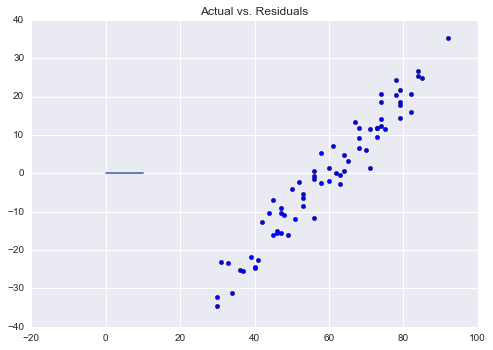

In [122]:
# Plot Residuals

lin_reg_residuals = y_test - test_set_pred3
plt.scatter(y_test, lin_reg_residuals)
plt.plot([0,10], [0, 0])
plt.title("Actual vs. Residuals")

In [37]:
from sklearn.cross_validation import cross_val_score, train_test_split, KFold
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer

/Users/billierolih/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [180]:
# use overall Score as Target
#y = df_smaller['Metascore']

# user-based
#y = df_smaller['tomatoU']

# user-based
y = df_smaller['imdbRating']

In [122]:
df_smaller[df_smaller['Rating'].isnull()]

,Rating,Rating_Count,w_Rating,logRating_Count,Pages,Metascore,Year,imdbRating,tomatoRating,tomatoU


In [ ]:
lr_model1.fit(X_train.loc[:,selected_columns],y_train)

In [89]:
selected_columns = ['Rating']

# Cross-Val Model 1: 

In [272]:
df_smaller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 10 columns):
Rating             233 non-null float64
Rating_Count       233 non-null int64
w_Rating           233 non-null float64
logRating_Count    233 non-null float64
Pages              233 non-null int64
Metascore          233 non-null int64
Year               233 non-null int64
imdbRating         233 non-null float64
tomatoRating       233 non-null float64
tomatoU            233 non-null float64
dtypes: float64(6), int64(4)
memory usage: 18.3 KB


In [271]:
X.info()a


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 9 columns):
Rating             233 non-null float64
Rating_Count       233 non-null int64
w_Rating           233 non-null float64
logRating_Count    233 non-null float64
Pages              233 non-null int64
tomatoU            233 non-null float64
imdbRating         233 non-null float64
Year               233 non-null int64
tomatoRating       233 non-null float64
dtypes: float64(6), int64(3)
memory usage: 16.5 KB


In [87]:
len(X)

233

In [88]:
len(X.dropna())

233

In [84]:
len(X_train)

186

In [181]:
# Holdout set
X_train, X_holdout, y_train,y_holdout = train_test_split(X.Rating,
                                                          y, test_size=0.2, random_state=42)

In [182]:
# Trainng data into folds
# Notice that we are splitting the X_train data into 5 Folds
kfold = KFold(len(X_train), n_folds=5, shuffle=True, random_state=0)


In [183]:
lin_reg_est = LinearRegression()

In [184]:
#y_train[~y_train.isnull()] (np.mean(np.abs(test_set_pred - y_test)))

In [275]:
# for train_rows, test_rows in kfold:
#     print(train_rows)

In [185]:
fold_scores = np.zeros(5)
i = 0
for train_rows, test_rows in kfold:
    
    #lin_reg_est.fit(X_train.loc[train_rows, selected_columns], y_train[train_rows])
    lin_reg_est.fit(X_train[train_rows], y_train[train_rows])
    
    #test_pred = lin_reg_est.predict(X_train.loc[train_rows, selected_columns])
    test_pred = lin_reg_est.predict(X_train[train_rows])
    fold_scores[i] = np.mean(np.abs(test_pred -y_test)) 
    #mean_squared_error(y_train[test_rows],test_pred)
    i+=1
fold_scores

/Users/billierolih/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# Model 2:
select 
selected_columns = ['w_Rating']

In [26]:
df_smaller.columns

Index([u'Rating', u'Rating_Count', u'w_Rating', u'logRating_Count', u'Pages',
       u'Metascore', u'Year', u'imdbRating', u'tomatoRating', u'tomatoU'],
      dtype='object')

In [19]:

selected_columns = ['w_Rating']

In [20]:
### DEFINE A MODEL OBJECT (LinearRegression)
lr_model2 = LinearRegression()

"""### that Object always has a fit method
    ### give matrix of predictors: X
    ### and vector of results : y 
    TRAIN SET is 70% of data
    >> your test set should be just big enough to give an accurate evalutation
"""
lr_model2.fit(X_train.loc[:,selected_columns],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
list(zip(X_train.columns,lr_model2.coef_))

[('Rating', 0.25679158613441888)]

In [22]:
test_set_pred2 = lr_model2.predict(X_test.loc[:,selected_columns])

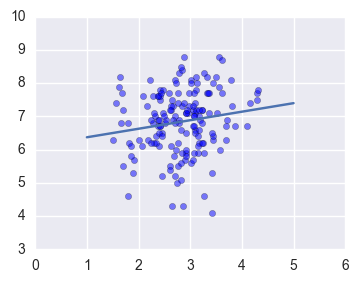

In [36]:
plt.figure(figsize=(4,3))
plt.scatter(X_train['w_Rating'], y_train, alpha=0.5)


vec1=np.linspace(1,5)
plt.plot(vec1, lr_model2.intercept_ + lr_model2.coef_[0]*vec1);
#ax=sns.regplot(X_train['w_Rating'], y_train)
#plt.ylabel('imdbRating');

In [40]:
#RMSE
np.sqrt(np.mean((test_set_pred2 - y_test)**2))

0.7881664608652349

In [41]:
#MAD
(np.mean(np.abs(test_set_pred2 - y_test)))

0.6865125296100604

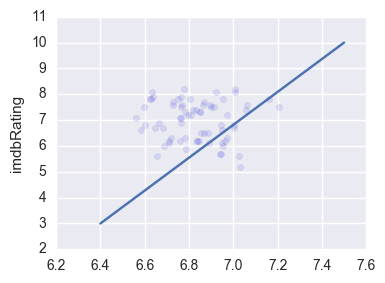

In [42]:
# plot against test
plt.figure(figsize=(4,3))
plt.scatter(test_set_pred2, y_test, alpha=0.1)
plt.plot(np.linspace(6.4,7.5), np.linspace(3,10))

plt.ylabel('imdbRating');

# Model 3:
* combine and add maybe Year

In [74]:
selected_columns = ['Rating','w_Rating', 'Year']

In [75]:
### DEFINE A MODEL OBJECT (LinearRegression)
lr_model3 = LinearRegression()

"""### that Object always has a fit method
    ### give matrix of predictors: X
    ### and vector of results : y 
    TRAIN SET is 70% of data
    >> your test set should be just big enough to give an accurate evalutation
"""
lr_model3.fit(X_train.loc[:,selected_columns],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
#X_train.loc[:,selected_columns]

In [76]:
list(zip(X_train.columns,lr_model3.coef_))

[('Rating', 1.4113277401514903),
 ('Rating_Count', -0.11917720376079038),
 ('w_Rating', -0.026391239910896029)]

In [77]:
test_set_pred3 = lr_model3.predict(X_test.loc[:,selected_columns])

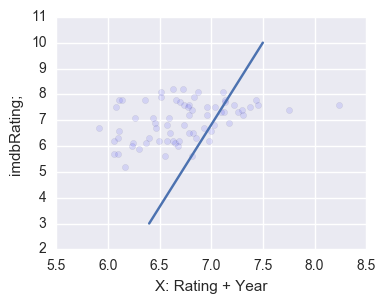

In [78]:
# plot against test
plt.figure(figsize=(4,3))
plt.scatter(test_set_pred3, y_test, alpha=0.1)
plt.plot(np.linspace(6.4,7.5), np.linspace(3,10))

plt.xlabel('X: Rating + Year')
plt.ylabel('imdbRating; ');

In [79]:
#RMSE
np.sqrt(np.mean((test_set_pred3 - y_test)**2))

0.74483447906339706

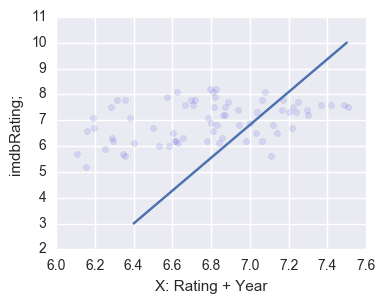

In [52]:
# plot against test
plt.figure(figsize=(4,3))
plt.scatter(test_set_pred3, y_test, alpha=0.1)
plt.plot(np.linspace(6.4,7.5), np.linspace(3,10))

plt.xlabel('X: Rating + Year')
plt.ylabel('imdbRating; ');

In [51]:
#RMSE
np.sqrt(np.mean((test_set_pred3 - y_test)**2))

0.72251970182840031

# Model 4 : just year

In [67]:
selected_columns = [ 'Year']

In [68]:
### DEFINE A MODEL OBJECT (LinearRegression)
lr_model3 = LinearRegression()

"""### that Object always has a fit method
    ### give matrix of predictors: X
    ### and vector of results : y 
    TRAIN SET is 70% of data
    >> your test set should be just big enough to give an accurate evalutation
"""
lr_model3.fit(X_train.loc[:,selected_columns],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [72]:
lr_model3.coef_

array([-0.03116036])

In [69]:
list(zip(X_train.columns,lr_model3.coef_))

[('Rating', -0.031160364618500993)]

In [70]:
test_set_pred3 = lr_model3.predict(X_test.loc[:,selected_columns])

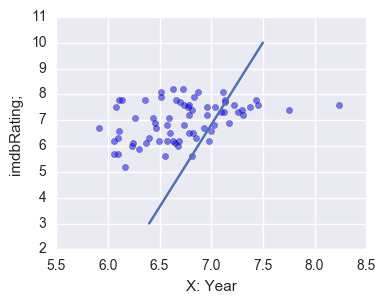

In [80]:
# plot against test
plt.figure(figsize=(4,3))
plt.scatter(test_set_pred3, y_test, alpha=0.5)
plt.plot(np.linspace(6.4,7.5), np.linspace(3,10))

plt.xlabel('X: Year')
plt.ylabel('imdbRating; ');

In [73]:
#RMSE
np.sqrt(np.mean((test_set_pred3 - y_test)**2))

0.75882334715858479